In [41]:
import dataInterpreter as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import squareform
from sklearn.metrics import adjusted_rand_score

In [14]:
filtered_data = dt.get_p_values('welch', dt.get_data_by_series(1), dt.get_columns('NHBE', 'healthy', series = (1,)), dt.get_columns('NHBE', 'sars-cov2', series = (1,)))
filtered_data

,Series1_NHBE_Mock_1,Series1_NHBE_Mock_2,Series1_NHBE_Mock_3,Series1_NHBE_SARS-CoV-2_1,Series1_NHBE_SARS-CoV-2_2,Series1_NHBE_SARS-CoV-2_3,p-value
SMIM1,1.609438,1.791759,1.945910,2.079442,2.397895,2.484907,0.026549
CA6,0.000000,0.000000,0.000000,0.693147,0.693147,1.098612,0.003592
C1orf127,0.000000,0.000000,0.000000,1.098612,1.386294,0.693147,0.006217
WNT4,4.262680,4.553877,4.615121,5.209486,4.844187,5.451038,0.028973
IFI6,3.912023,4.521789,3.637586,5.337538,5.455321,6.816736,0.027099
...,...,...,...,...,...,...,...
MAOB,3.367296,3.465736,3.218876,2.484907,2.639057,2.639057,0.000984
PFKFB1,0.693147,0.693147,0.000000,1.791759,1.609438,1.386294,0.011914
MIR503,1.386294,1.098612,1.098612,0.693147,0.000000,0.000000,0.018281
PNMA3,0.000000,0.000000,0.000000,0.693147,0.693147,1.791759,0.044438


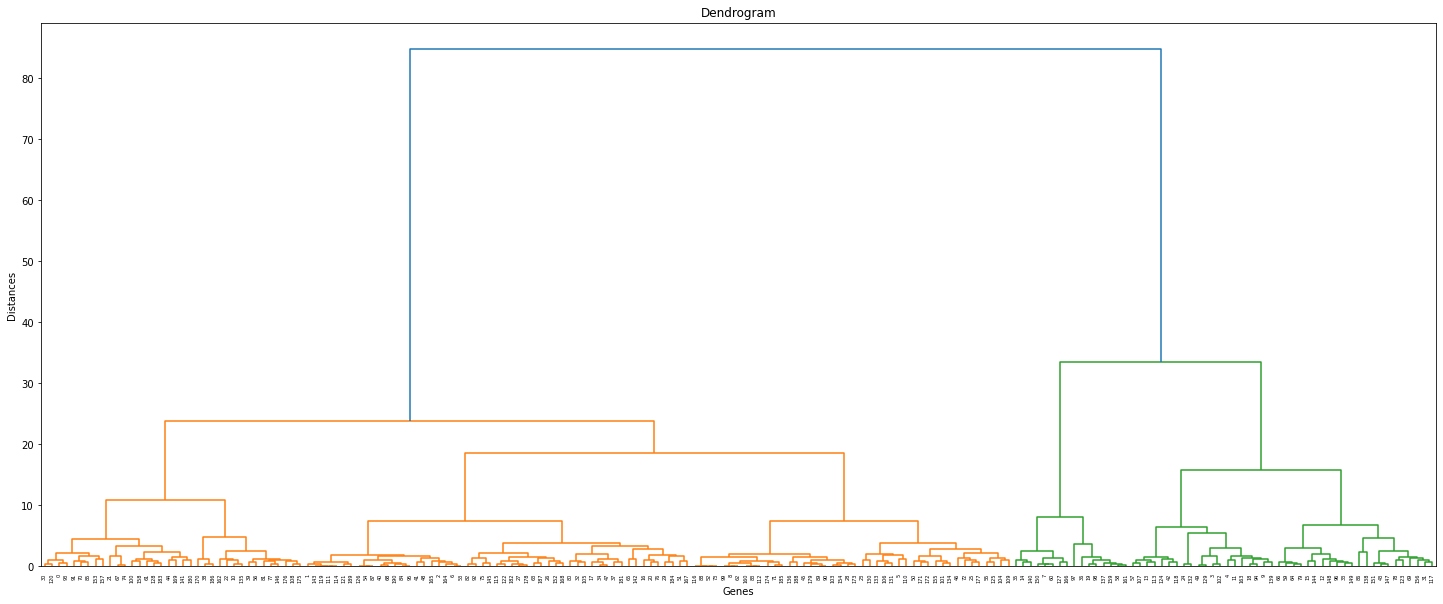

In [16]:
filtered_data.drop(['p-value'], axis = 1, inplace = True)
dt.plot_dendrogram(filtered_data)

In [28]:
labels = {}

models = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage ='ward')
labels['distance'] = models.fit_predict(filtered_data)

In [29]:
labels['distance']

array([0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 2, 1, 1, 2, 0, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [34]:
dissimilarity = 1 - np.abs(filtered_data.T.corr())
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['pearson'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [35]:
labels['pearson']

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 0, 0,
       0, 1, 1, 2, 2, 0, 2, 2, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 2, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 1,
       1, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 1, 0, 1, 2,
       2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 2, 0, 1, 0, 0, 0, 1, 1, 0, 2, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 2, 1, 1, 1, 0, 0, 0], dtype=int32)

In [36]:
dissimilarity = 1 - np.abs(filtered_data.T.corr(method='spearman'))
hierarchy = linkage(squareform(dissimilarity), method='ward')
labels['spearman'] = fcluster(hierarchy, 3, criterion='maxclust') - 1

In [37]:
labels['spearman']

array([1, 2, 0, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 2,
       1, 2, 0, 0, 2, 2, 0, 1, 2, 1, 0, 1, 0, 1, 2, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 0, 0, 2, 1, 2, 1, 0, 0, 0, 1, 2,
       1, 2, 0, 1, 2, 0, 2, 0, 2, 2, 2, 0, 2, 1, 2, 0, 2, 0, 1, 2, 1, 0,
       0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 2, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 2, 0, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0, 2, 2, 0, 0, 1, 2, 1, 2, 0,
       0, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 1, 1, 1, 1, 2, 2, 2,
       0, 0, 2, 1, 2, 1, 0, 1, 2, 2, 0, 0, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 2, 0, 1, 1, 2, 2, 1, 0, 0, 0, 1, 2, 0], dtype=int32)

In [69]:
from itertools import groupby

clusters = {}

for key1, label1 in labels.items():
    clusters[key1] = [list(map(lambda x: x[0], v)) for k,v in groupby(sorted(zip(filtered_data.index, labels['spearman']), key = lambda x: x[1]), lambda s: s[1])]
    
    for key2, label2 in labels.items():
        if key1 != key2:
            print(key1, ' vs ', key2, ': ', adjusted_rand_score(label1, label2))

distance  vs  pearson :  -0.010228389779375494
distance  vs  spearman :  0.1449819115597125
pearson  vs  distance :  -0.010228389779375494
pearson  vs  spearman :  0.3857351714859874
spearman  vs  distance :  0.1449819115597125
spearman  vs  pearson :  0.3857351714859874


In [ ]:
i = 0
for c in clusters['distance']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['pearson']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

In [ ]:
i = 0
for c in clusters['spearman']:
    print("\n\nCluster", i, ":\n")
    i += 1
    for x in c:
        print(x)

## Clustering on columns

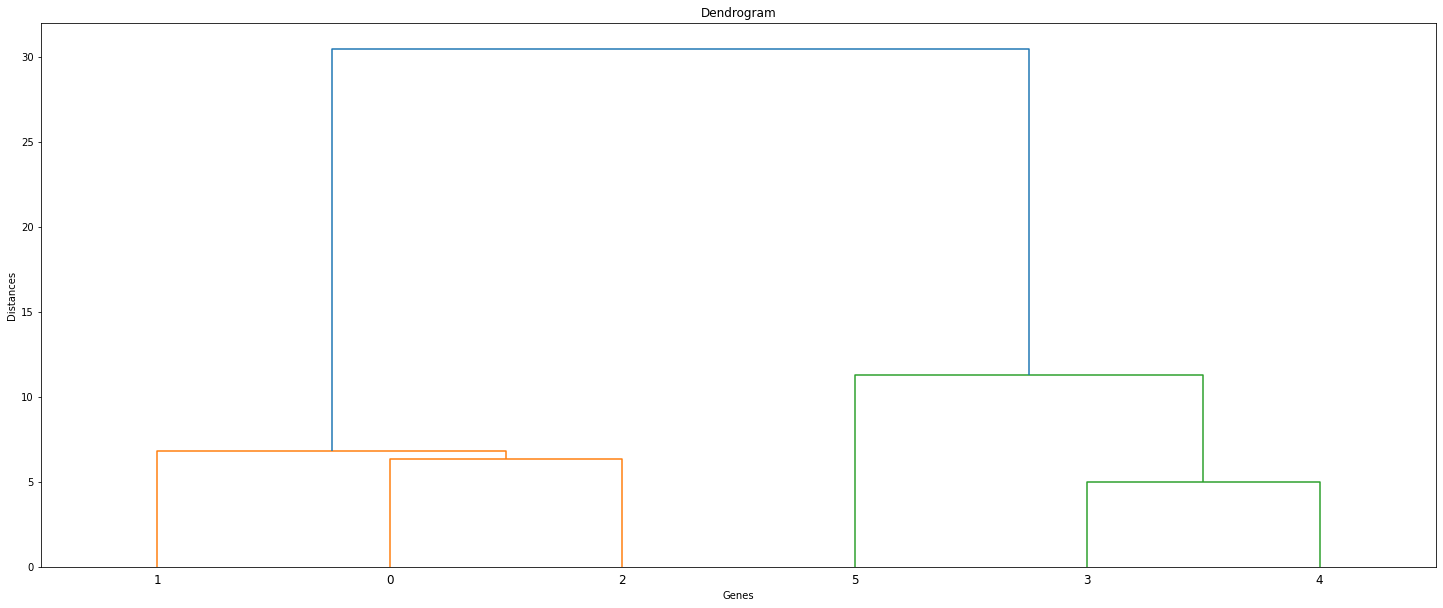

In [99]:
dt.plot_dendrogram(filtered_data.T)

In [108]:
labels_columns = {}

models = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage ='ward')
labels_columns['distance'] = models.fit_predict(filtered_data.T)

labels_columns['distance']

array([1, 1, 1, 0, 0, 0], dtype=int64)